## Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/StartUps-RawData.csv')

In [ ]:
df.head()

,LB ID,Primary name,Batch,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s),date modified,creation date,OffsetId,CreationTime,Brazil Site,Publicity/Confidentiality concerns,Deal confidentiality,Durians Site
0,A11869,1Huddle,15,https://1huddle.co/,US - Non CA,US,HR / Education,2015-11-06,Professional training,SaaS,Fund III,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN
1,A11789,3D Look,NaN,https://3dlook.me/,US - Non CA,US,Retail / eCommerce,2018-06-19,Fashion,SaaS,Istanbul,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN
2,A11353,3TEN8,NaN,http://www.3ten8.ai/,US - CA,US,IT / Security,2017-07-21,IT tools,SaaS,Falcons,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN
3,A10019,4Vets,NaN,http://4vets.com.br,LatAm,Brazil,Retail / eCommerce,2013-08-16,Pets,On-demand / Delivery,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,True,NaN,NaN,NaN
4,A10035,9Slides,NaN,http://9slides.com,US - Non CA,US,Media / Collaboration,2012-08-02,Media production,SaaS,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

LB ID                                    0
Primary name                             0
Batch                                  726
URL                                      8
Region                                   0
Country                                  0
Parent sector                           71
Initial invest date                     14
PrimarySector_API                       57
Platform zaps                           77
Fund(s)                                 13
date modified                            0
creation date                            0
OffsetId                                 0
CreationTime                             0
Brazil Site                           1511
Publicity/Confidentiality concerns    1538
Deal confidentiality                  1546
Durians Site                          1545
dtype: int64

Columns To be drop - Reason

1. Brazil Site --> Null Values greater than 1500 so dropped
2. Publicity/Confidentiality concerns --> Null Values greater than 1500 so dropped
3. Deal confidentiality --> Null Values greater than 1500 so dropped
4. Durians Site --> Null Values greater than 1500 so dropped
5. Batch --> On Checking it was found it's not related to project aim
6. date modified --> date when information is updated last on website, so not relevant
7. creation date --> date when information is created on website, so not relevant
8. CreationTime  --> Time when information was first created on site, so not relevant
9. OffsetId --> URL Meta data which is fetch during scrapping, so not relevant 

In [ ]:
colstodrop = ['Brazil Site','Publicity/Confidentiality concerns','Deal confidentiality','Durians Site','Batch','date modified','creation date','CreationTime','OffsetId']
df = df.drop(columns = colstodrop)

In [ ]:
df.head(10)

,LB ID,Primary name,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s)
0,A11869,1Huddle,https://1huddle.co/,US - Non CA,US,HR / Education,2015-11-06,Professional training,SaaS,Fund III
1,A11789,3D Look,https://3dlook.me/,US - Non CA,US,Retail / eCommerce,2018-06-19,Fashion,SaaS,Istanbul
2,A11353,3TEN8,http://www.3ten8.ai/,US - CA,US,IT / Security,2017-07-21,IT tools,SaaS,Falcons
3,A10019,4Vets,http://4vets.com.br,LatAm,Brazil,Retail / eCommerce,2013-08-16,Pets,On-demand / Delivery,Fund II
4,A10035,9Slides,http://9slides.com,US - Non CA,US,Media / Collaboration,2012-08-02,Media production,SaaS,Fund II
5,A10005,15Five,http://15five.com,US - Non CA,US,HR / Education,2012-12-20,Personnel / Benefits,SaaS,Fund II
6,A10017,42,http://42technologies.com,"Canada, US - CA","Canada, US",Marketing / Customer Success,2014-08-13,Market intel,SaaS,Fund III
7,A10016,42 Floors,http://42floors.com,US - Non CA,US,Real Estate / Transportation,2012-04-15,Realty / Rentals,Marketplace,Fund II
8,A10018,43Layers,http://43layers.com,US - CA,US,Retail / eCommerce,2015-08-13,Consumer eCom,On-demand / Delivery,Fund III
9,A10614,64 Pixels,http://64px.com,US - CA,US,Media / Collaboration,2010-10-06,Social media,SaaS,Fund I


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   LB ID                1555 non-null   object
 1   Primary name         1555 non-null   object
 2   URL                  1547 non-null   object
 3   Region               1555 non-null   object
 4   Country              1555 non-null   object
 5   Parent sector        1484 non-null   object
 6   Initial invest date  1541 non-null   object
 7   PrimarySector_API    1498 non-null   object
 8   Platform zaps        1478 non-null   object
 9   Fund(s)              1542 non-null   object
dtypes: object(10)
memory usage: 121.6+ KB


In [ ]:
df[df.URL.notnull() == False]

,LB ID,Primary name,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s)
53,A12523,Ambience Healthcare,NaN,US - CA,US,NaN,2020-09-11,Healthcare Services & Telehealth,NaN,Fund V
357,A12576,DBA BuiltFirst,NaN,US - CA,US,Software and Services,NaN,Productivity,NaN,NaN
428,A12552,EST,NaN,US - CA,US,Media / Collaboration,2020-10-17,Social media,Cloud / Content,"TukTuks II,Durians III"
501,A10707,Foundation Mobile,NaN,LatAm,Brazil,NaN,2011-05-16,NaN,NaN,Fund I
720,A12604,Knowtions,NaN,Canada,Canada,Financial Technology,NaN,Insurance,NaN,Fund V
865,A12165,Mod Snob,NaN,US - CA,US,Retail / eCommerce,2018-11-27,Fashion,NaN,Kimchi I
994,A12567,Pencil,NaN,US - CA,US,HR / Education,2020-11-16,Education ERP,NaN,Vietnam
1358,A12630,Ticketrev,NaN,US - CA,US,Consumer,2021-05-31,Gaming & eSports,NaN,Fund V


In [ ]:
countries = df.Country.unique()

In [ ]:
len(countries)

17

In [ ]:
# Countries column contains all the countries where startup/ its services are present
for con in countries:
  print(con)

US
Brazil
Canada, US
Mexico
Canada
Russia,US
Chile
Peru
Colombia
US, US, US
Argentina
Ghana,US
Uruguay
Nigeria, US
US, Russia
US, Turkey
US, South Africa


In [ ]:
df.Country = df.Country.replace({"Canada, US" : "US",
 "Russia,US" : "US",
 "US, US, US" : "US",
 "Ghana,US" : "US",
 "Nigeria, US" : "US",
 "US, Russia" : "US",
 "US, Turkey" : "US",
 "US, South Africa" : "US"})

In [ ]:
df.Country.unique()

array(['US', 'Brazil', 'Mexico', 'Canada', 'Chile', 'Peru', 'Colombia',
       'Argentina', 'Uruguay'], dtype=object)

In [ ]:
df.columns

Index(['LB ID', 'Primary name', 'URL', 'Region', 'Country', 'Parent sector',
       'Initial invest date', 'PrimarySector_API', 'Platform zaps', 'Fund(s)'],
      dtype='object')

Country
Argentina      27
Brazil         44
Canada        102
Chile          17
Colombia       16
Mexico        112
Peru           10
US           1226
Uruguay         1
Name: LB ID, dtype: int64


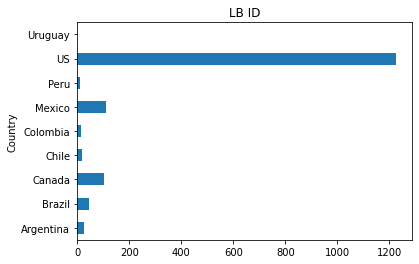

Country
Argentina      27
Brazil         44
Canada        102
Chile          17
Colombia       16
Mexico        112
Peru           10
US           1226
Uruguay         1
Name: Primary name, dtype: int64


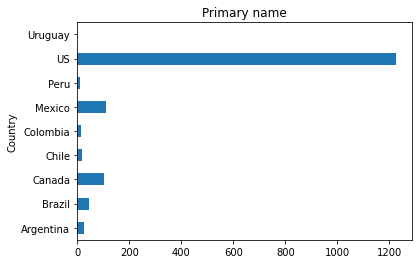

Country
Argentina      27
Brazil         43
Canada        101
Chile          17
Colombia       16
Mexico        112
Peru           10
US           1220
Uruguay         1
Name: URL, dtype: int64


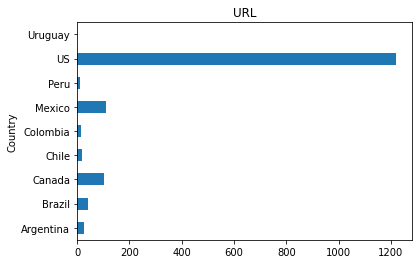

Country
Argentina      27
Brazil         44
Canada        102
Chile          17
Colombia       16
Mexico        112
Peru           10
US           1226
Uruguay         1
Name: Region, dtype: int64


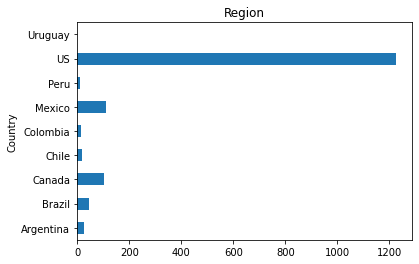

Country
Argentina      25
Brazil         43
Canada        101
Chile          13
Colombia       12
Mexico         94
Peru            9
US           1186
Uruguay         1
Name: Parent sector, dtype: int64


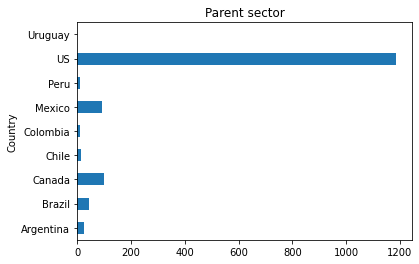

Country
Argentina      27
Brazil         44
Canada        101
Chile          17
Colombia       16
Mexico        111
Peru           10
US           1214
Uruguay         1
Name: Initial invest date, dtype: int64


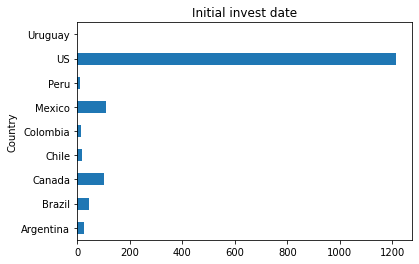

Country
Argentina      25
Brazil         43
Canada        101
Chile          15
Colombia       12
Mexico         97
Peru            9
US           1195
Uruguay         1
Name: PrimarySector_API, dtype: int64


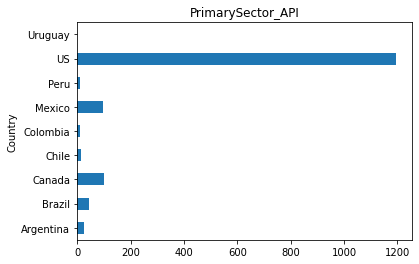

Country
Argentina      26
Brazil         43
Canada         97
Chile          14
Colombia       11
Mexico         99
Peru            9
US           1178
Uruguay         1
Name: Platform zaps, dtype: int64


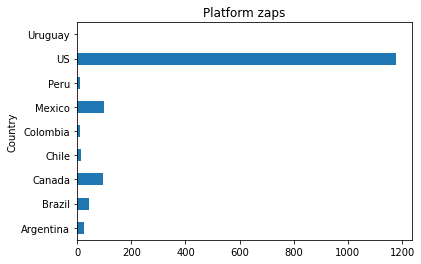

Country
Argentina      27
Brazil         44
Canada        102
Chile          17
Colombia       16
Mexico        111
Peru           10
US           1214
Uruguay         1
Name: Fund(s), dtype: int64


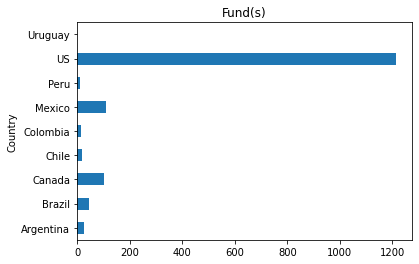

In [ ]:
iterCols = ['LB ID', 'Primary name', 'URL', 'Region', 'Parent sector',
       'Initial invest date', 'PrimarySector_API', 'Platform zaps', 'Fund(s)']
grpbyObj = df.groupby('Country').count()
for col in iterCols:
  print(grpbyObj[col])
  grpbyObj[col].plot(kind = 'barh',title = col)
  plt.show()


In [ ]:
# Filtering only US Region records
df = df[df.Country == "US"]

In [ ]:
df.head()

,LB ID,Primary name,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s)
0,A11869,1Huddle,https://1huddle.co/,US - Non CA,US,HR / Education,2015-11-06,Professional training,SaaS,Fund III
1,A11789,3D Look,https://3dlook.me/,US - Non CA,US,Retail / eCommerce,2018-06-19,Fashion,SaaS,Istanbul
2,A11353,3TEN8,http://www.3ten8.ai/,US - CA,US,IT / Security,2017-07-21,IT tools,SaaS,Falcons
4,A10035,9Slides,http://9slides.com,US - Non CA,US,Media / Collaboration,2012-08-02,Media production,SaaS,Fund II
5,A10005,15Five,http://15five.com,US - Non CA,US,HR / Education,2012-12-20,Personnel / Benefits,SaaS,Fund II


In [ ]:
df.isnull().sum()

LB ID                   0
Primary name            0
URL                     6
Region                  0
Country                 0
Parent sector          40
Initial invest date    12
PrimarySector_API      31
Platform zaps          48
Fund(s)                12
dtype: int64

In [ ]:
df.to_csv('cleaned-data1.csv',index = False)

## LinkedIn Scrapping

In [ ]:
dfl = pd.read_csv('StartUps-RawData.csv')

In [ ]:
dfl.head()

,LB ID,Primary name,Batch,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s),date modified,creation date,OffsetId,CreationTime,Brazil Site,Publicity/Confidentiality concerns,Deal confidentiality,Durians Site
0,A11869,1Huddle,15,https://1huddle.co/,US - Non CA,US,HR / Education,2015-11-06,Professional training,SaaS,Fund III,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN
1,A11789,3D Look,NaN,https://3dlook.me/,US - Non CA,US,Retail / eCommerce,2018-06-19,Fashion,SaaS,Istanbul,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN
2,A11353,3TEN8,NaN,http://www.3ten8.ai/,US - CA,US,IT / Security,2017-07-21,IT tools,SaaS,Falcons,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN
3,A10019,4Vets,NaN,http://4vets.com.br,LatAm,Brazil,Retail / eCommerce,2013-08-16,Pets,On-demand / Delivery,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,True,NaN,NaN,NaN
4,A10035,9Slides,NaN,http://9slides.com,US - Non CA,US,Media / Collaboration,2012-08-02,Media production,SaaS,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,NaN,NaN,NaN,NaN
